In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import decomposition

from sklearn.preprocessing import StandardScaler

def catch_df_get(path=''):
    catch_df=pd.read_csv(path)
    options=np.arange(500,1500)
    catch_df =catch_df.loc[catch_df['id_ves'].isin(options)]
    catch_df.sort_values(by='id_ves')
    return catch_df

catch_df=catch_df_get(r'C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет2/db1/catch.csv')

def product_df_get(path=''):
    product_df=pd.read_csv(path)
    options=np.arange(500,1500)
    product_df =product_df.loc[product_df['id_ves'].isin(options)]
    product_df.sort_values(by='id_ves')
    return product_df

product_df=product_df_get(r'C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет2/db1/product.csv')

#получим сводную таблицу db1 из 1 и 2
db1=catch_df.merge(product_df,how='inner')
db1.drop(columns='date',inplace=True)
db1

def ext_df_get(path=''):
    Ext_df=pd.read_csv(path,error_bad_lines=False,engine='python',sep=',')
    Ext_df=Ext_df.drop(['Name_Plat','Product_period','Region_Plat',"numPart"],axis='columns')
    options=np.arange(500,1500)
    Ext_df=Ext_df.loc[Ext_df['id_ves'].isin(options)]
    return Ext_df


ext_df=ext_df_get(r"C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет2/db2/Ext.csv")

def ext2_df_get(path=''):
    Ext_df2=pd.read_csv(path, error_bad_lines=False, engine ='python', sep=',')
    Ext_df2=Ext_df2.drop(['unit'],axis='columns')
    return Ext_df2

ext_df2=ext2_df_get(r"C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет2/db2/Ext2.csv")

#получаем таблицу 2 из 3 и 4
db2=ext_df.merge(ext_df2,how='inner',left_on='id_vsd',right_on='id_vsd')
db2.drop(columns=['date_fishery','fish','date_vsd'],inplace=True)
db2

#слияние базы 1 и 2 и выборка данных случайная
data=pd.merge(db1,db2,how='inner')
data=data.sample(frac=0.01)
data

data['id_fish'] = [str(x).replace(',', '.') for x in data['id_fish']]
data['if_fish'] = data['id_fish'].astype(float)
data['prod_volume'] = [str(x).replace(',', '.') for x in data['prod_volume']]
data['prod_volume'] = data['prod_volume'].astype(float)*1000
data['prod_board_volume'] = [str(x).replace(',', '.') for x in data['prod_board_volume']]
data['prod_board_volume'] = data['prod_board_volume'].astype(float)*1000
data['catch_volume'] = [str(x).replace(',', '.') for x in data['catch_volume']]
data['catch_volume'] = data['catch_volume'].astype(float)*1000
data['if_fish'] = [str(x).replace(',', '.') for x in data['if_fish']]
data['if_fish'] = data['if_fish'].astype(float)
data.drop(['if_fish','id_fish'],axis=1,inplace=True)
data

<ipython-input-1-8815f78a9705>:30: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  catch_df=pd.read_csv(path)
<ipython-input-1-8815f78a9705>:39: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  product_df=pd.read_csv(path)
<ipython-input-1-8815f78a9705>:53: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Ext_df=pd.read_csv(path,error_bad_lines=False,engine='python',sep=',')
<ipython-input-1-8815f78a9705>:63: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Ext_df2=pd.read_csv(path, error_bad_lines=False, engine ='python', sep=',')


,id_ves,id_region,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,id_Plat,id_vsd,num_vsd,volume
4150958,1434,207,5415.480,15,1998,1111,1,4636,576.000,576.000,6289550,6883399,3253397,773
22490163,1325,108,23306.000,15,1947,981,1,3808,712.620,6842.260,6289684,7958244,5600453,5708
18774516,1452,207,41.000,97,1711,1144,1,4409,423.000,6337.000,6290105,7318190,6212322,85
6861186,1284,206,27246.986,15,1829,1047,1,9334,0.000,224.730,6294909,6667695,5882305,35710
30252897,1457,207,122.000,15,2652,1187,1,5466,0.000,1634.460,6295278,7363756,4688098,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464870,1335,207,1415.400,15,2599,1047,1,4195,158.000,2203.000,6294370,9012288,5947267,816
15818737,1292,206,693.000,97,2184,1114,1,9410,377.000,3320.000,6293229,7011584,5457419,5454
30874446,1380,273,33687.000,1,1952,925,1,3501,8691.156,78560.578,6292669,8619975,4049098,70133
9169869,1460,437,7766.000,15,2973,1269,1,5444,1342.000,8767.000,6289435,7675537,6004477,1365


<AxesSubplot:>

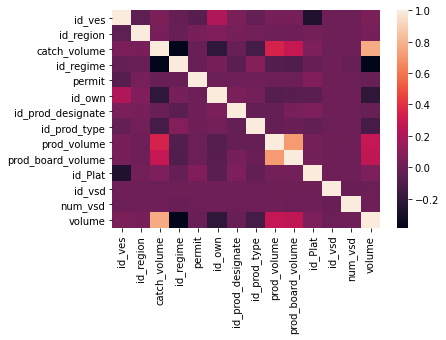

In [2]:
sns.heatmap(data.corr())

In [3]:
some_data=data.sample(frac=0.2)

In [4]:
some_data

,id_ves,id_region,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,id_Plat,id_vsd,num_vsd,volume
21773768,1498,108,741.000,18,2747,1234,1,3732,0.00,30.00,6296509,9096712,5152189,8910
36753,1461,274,58264.000,1,1704,951,1,1472,2644.80,68559.60,6295789,9466391,5178324,146385
27799941,1455,437,84.045,97,2324,1041,1,9354,21.04,151.54,6288962,7152583,5742732,670
19987328,1297,207,63.000,97,2940,964,1,1175,0.00,432.00,6294698,7750076,5166750,1931
13657347,1388,108,5174.000,15,2243,1160,1,3631,328.54,5340.12,6296014,6954697,4654114,6762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27872633,1404,207,56.000,97,2823,1271,1,3817,13358.00,171762.00,6288932,8531081,3396070,170
6641950,1284,108,11584.563,15,1829,1047,1,4919,0.00,17.00,6294909,7254734,5654032,43494
174436,1423,273,51765.000,1,1887,1091,1,1473,0.00,454.20,6292210,8045663,4211432,88649
11430892,1290,437,370.000,97,1920,1156,1,9302,5209.65,62883.54,6296848,8408467,4820926,1626


In [5]:
import pickle
with open(r'C:/Users/Jora/Desktop/cifra_2022.05.26/POST_PROD/hard_model.pkl', 'rb') as f:
     class_model = pickle.load(f)

In [6]:
scaler=preprocessing.MinMaxScaler()

In [7]:
class_some_data=class_model.predict(scaler.fit_transform(some_data))

In [8]:
some_data['class']=class_some_data
some_data

,id_ves,id_region,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,id_Plat,id_vsd,num_vsd,volume,class
21773768,1498,108,741.000,18,2747,1234,1,3732,0.00,30.00,6296509,9096712,5152189,8910,0
36753,1461,274,58264.000,1,1704,951,1,1472,2644.80,68559.60,6295789,9466391,5178324,146385,0
27799941,1455,437,84.045,97,2324,1041,1,9354,21.04,151.54,6288962,7152583,5742732,670,3
19987328,1297,207,63.000,97,2940,964,1,1175,0.00,432.00,6294698,7750076,5166750,1931,3
13657347,1388,108,5174.000,15,2243,1160,1,3631,328.54,5340.12,6296014,6954697,4654114,6762,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27872633,1404,207,56.000,97,2823,1271,1,3817,13358.00,171762.00,6288932,8531081,3396070,170,2
6641950,1284,108,11584.563,15,1829,1047,1,4919,0.00,17.00,6294909,7254734,5654032,43494,3
174436,1423,273,51765.000,1,1887,1091,1,1473,0.00,454.20,6292210,8045663,4211432,88649,2
11430892,1290,437,370.000,97,1920,1156,1,9302,5209.65,62883.54,6296848,8408467,4820926,1626,0
